# Zara Sales Data-EDA and Business insights

##### Data= kaggel-Zara Sales Data
##### ✅ EDA & Visualization: Analyze pricing distributions, seasonal patterns, material diversity, and gender-based product segmentation.
##### ✅ Business Insights: Study fast-fashion logistics, sustainability patterns by origin, or profitability by fabric type.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [5]:
df=pd.read_csv(r"C:\Users\sangi\Documents\Zara_sales_EDA.csv",sep=';')

In [7]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [9]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [13]:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
df=df.dropna(subset=['name'])
df['description']=df['description'].fillna('No Description available')

In [19]:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                0
description         0
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [21]:
df.to_csv('Zara_Cleaned_Data.csv',index=False)

### Part 1: EDA and visualization

#### 1. Pricing Distribution

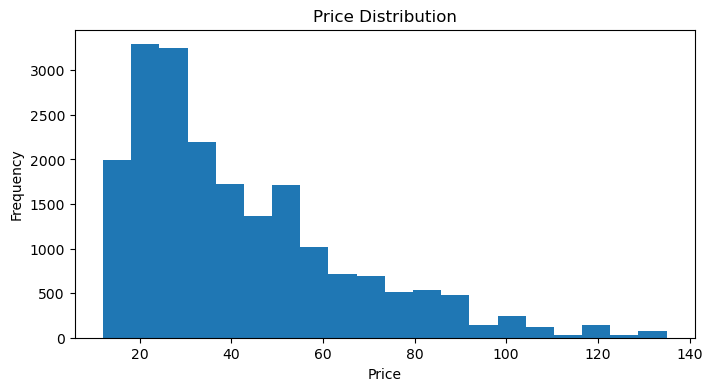

In [44]:
plt.figure(figsize=(8,4))
plt.hist(x='price',data=df,bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

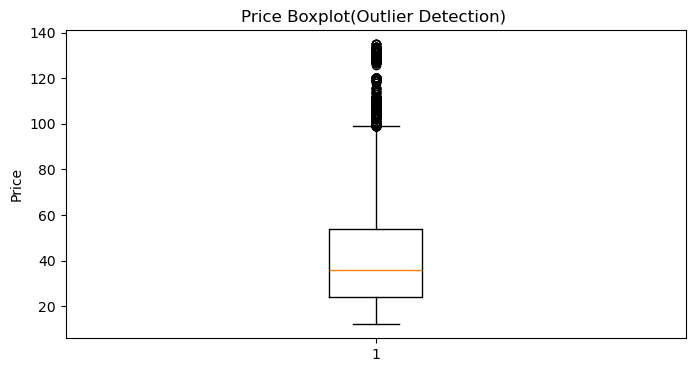

In [118]:
plt.figure(figsize=(8,4))
plt.boxplot(df['price'])
plt.title('Price Boxplot(Outlier Detection) ')
plt.ylabel('Price')
plt.show()

In [98]:
print('Price Summery:\n',df['price'].describe())

Price Summery:
 count    20251.000000
mean        41.949999
std         23.381156
min         12.000000
25%         23.950000
50%         35.950000
75%         53.950000
max        134.990000
Name: price, dtype: float64


#### 2. Seasonal Patterns

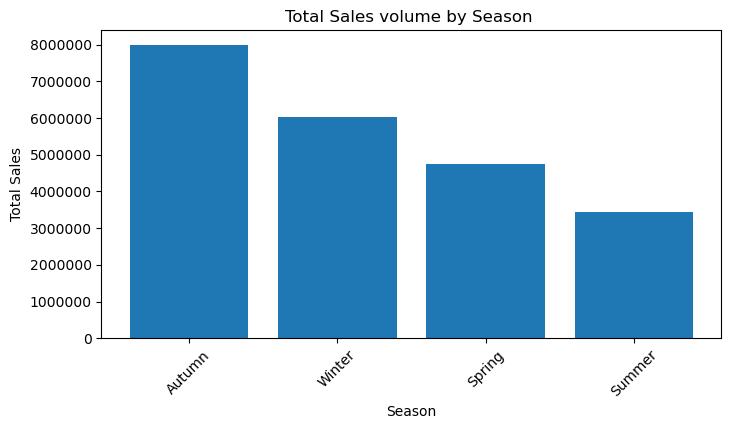

In [66]:
# Total Sales by Season :

season_sales=df.groupby('season')['Sales Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(season_sales.index,season_sales.values)
plt.title('Total Sales volume by Season ')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

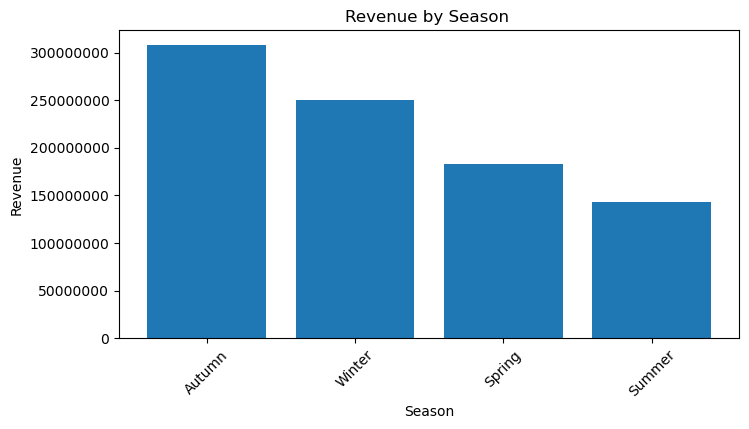

In [64]:
# Revenue by Season :

df['Revenue']=df['price']*df['Sales Volume']
season_revenue=df.groupby('season')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(season_revenue.index,season_revenue.values)
plt.title('Revenue by Season ')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()


#### 3. Material Diversity

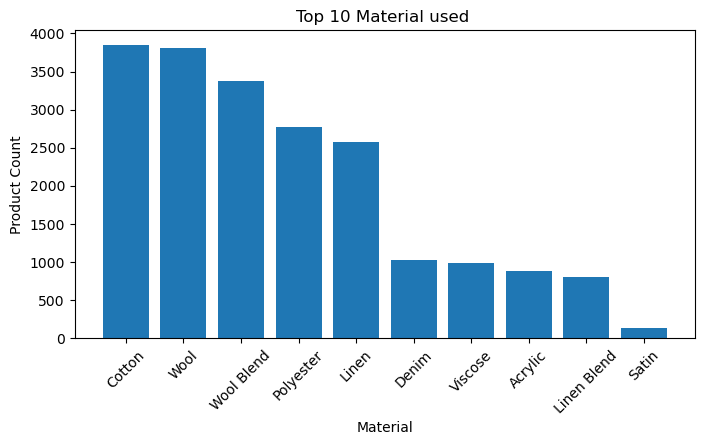

In [53]:
# Top 10 material by Count :

material_count=df['material'].value_counts().head(10)

plt.figure(figsize=(8,4))
plt.bar(material_count.index,material_count.values)
plt.title('Top 10 Material used ')
plt.xlabel('Material')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.show()


#### 4. Gender based Segmentation

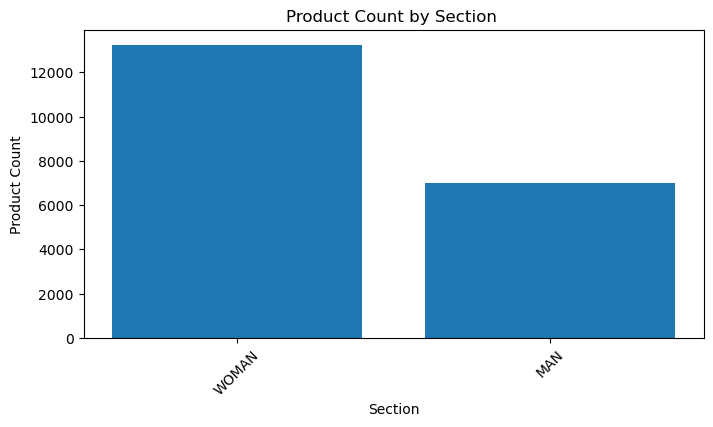

In [93]:
# Product Count by Section :

section_count=df['section'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(section_count.index,section_count.values)
plt.title('Product Count by Section ')
plt.xlabel('Section')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.show()

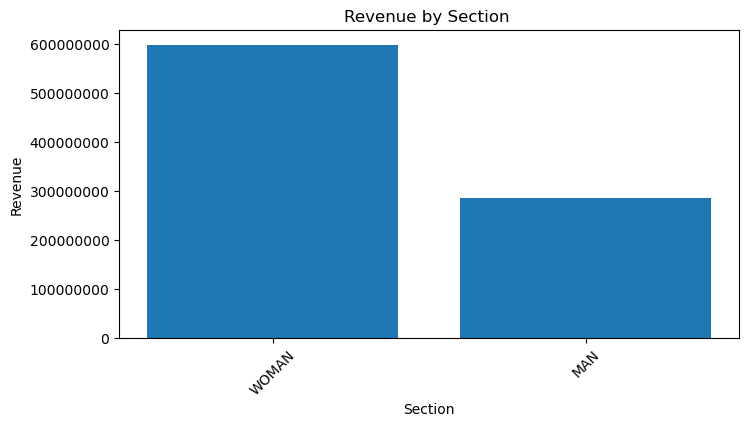

In [70]:
# Revenue by Section :

section_revenue=df.groupby('section')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(section_revenue.index,section_revenue.values)
plt.title('Revenue by Section ')
plt.xlabel('Section')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

### Part 2 : Business Insights

#### 5. Fast-Fashion Logistics

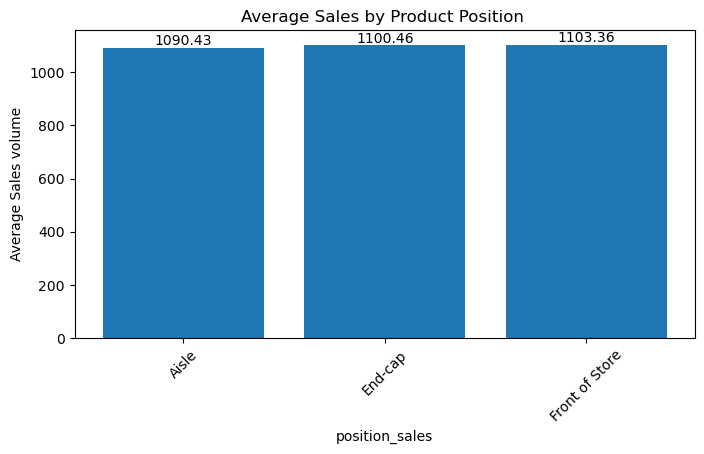

In [103]:
# Product Position Impact :

position_sales=df.groupby('Product Position')['Sales Volume'].mean()

plt.figure(figsize=(8,4))
ax=plt.bar(position_sales.index,position_sales.values)
plt.bar_label(ax)
plt.title('Average Sales by Product Position ')
plt.xlabel('position_sales')
plt.ylabel('Average Sales volume')
plt.xticks(rotation=45)
plt.show()

#### 6. Sustainability Patterns(Origin Analysis)

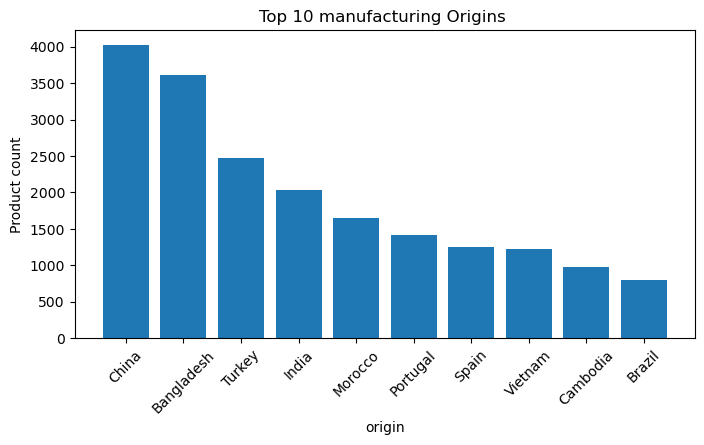

In [78]:
# Top 10 manufacturing origins :

origin_count=df['origin'].value_counts().head(10)

plt.figure(figsize=(8,4))
plt.bar(origin_count.index,origin_count.values)
plt.title('Top 10 manufacturing Origins ')
plt.xlabel('origin')
plt.ylabel('Product count')
plt.xticks(rotation=45)
plt.show()

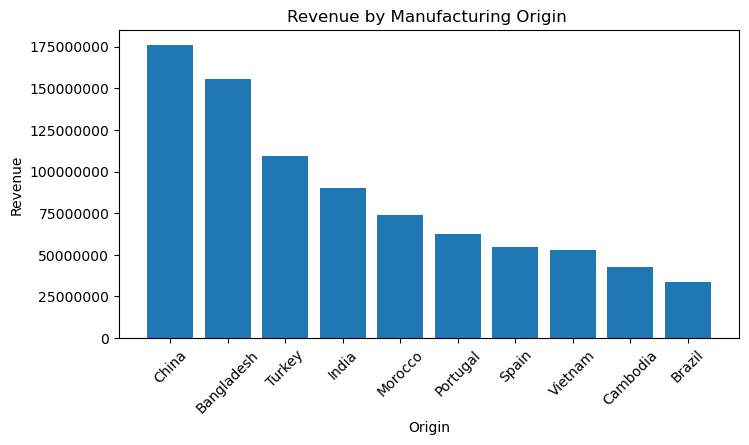

In [80]:
# Revenue by Manufacturing Origin :

origin_revenue=df.groupby('origin')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(origin_revenue.index,origin_revenue.values)
plt.title('Revenue by Manufacturing Origin ')
plt.xlabel('Origin')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

#### 7. Profitability by Fabric Type

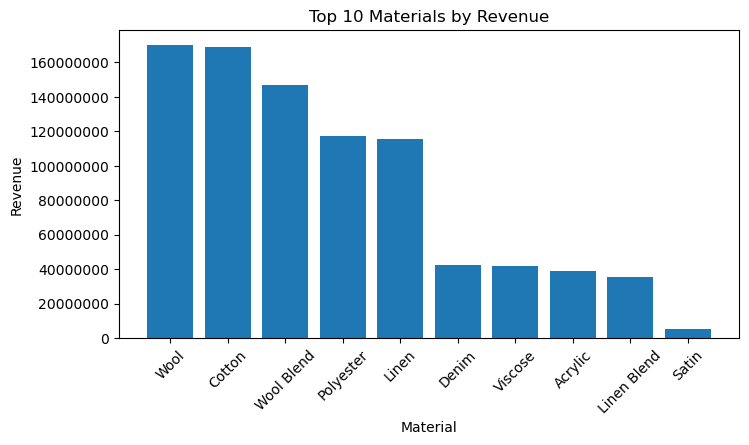

In [89]:
# Top 10 Materials by Revenue :

fabric_profit=df.groupby('material')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(fabric_profit.index,fabric_profit.values)
plt.title('Top 10 Materials by Revenue')
plt.xlabel('Material')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

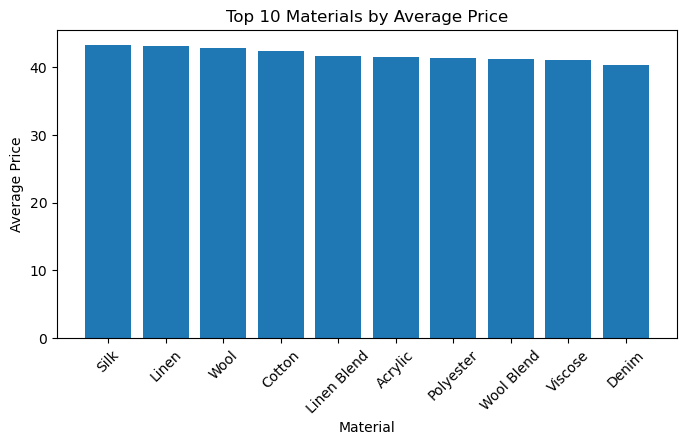

In [91]:
fabric_avg_price=df.groupby('material')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(fabric_avg_price.index,fabric_avg_price.values)
plt.title('Top 10 Materials by Average Price')
plt.xlabel('Material')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

### Key Finding from Exploratory Data Analysis

##### ->> Pricing distribution is right-skewed,indicating a mix of mid-range and premium products.
##### ->> Autumn and Winter generated higher revenue compared Summer
##### ->> Women's section contributed more to total revenue
##### ->> Certain material wool and cotton blends generated higher profitability.
##### ->> Product placement(like front-store positioning) influenced average sales volume.